
**CAR PRICE PREDICTION & ANALYSIS**
---

NOTE : *THIS PREDICTION AND ANALYSIS IS BASED ON PAST DATA, SO FOR MORE ACCURATE AND EFFICIENT PREDICTIONS WE NEED CURRENT DATA TO FEED THE MODEL.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

df = pd.read_csv('/content/car data.csv')

df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**COULMN INFORMATION & IT'S RELATIONSHIP**

In [ ]:
print("Data information ...\n")
df.info()

print("\nRelation Between Columns ....\n")
df.corr()

Data information ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Relation Between Columns ....



<ipython-input-18-0ce549584f4e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


**FEUL TYPE DISTRIBUTION COUNT**

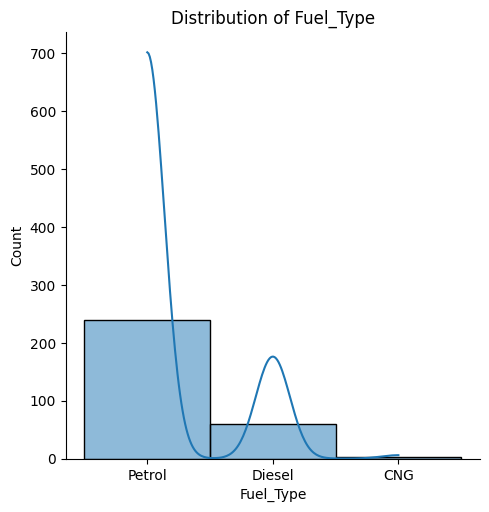

In [ ]:
plot_continuous_distribution(df, 'Fuel_Type',5)

**TRANSMISSION TYPE COUNT, BASED ON THE DATA PROVIDED.**

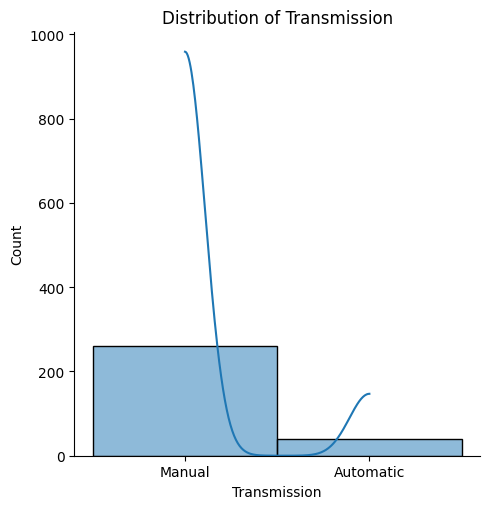

In [ ]:
plot_continuous_distribution(df, 'Transmission',5)

**CAR STOCK DISTRIBUTION ACCORDING TO THE YEAR BASIS**

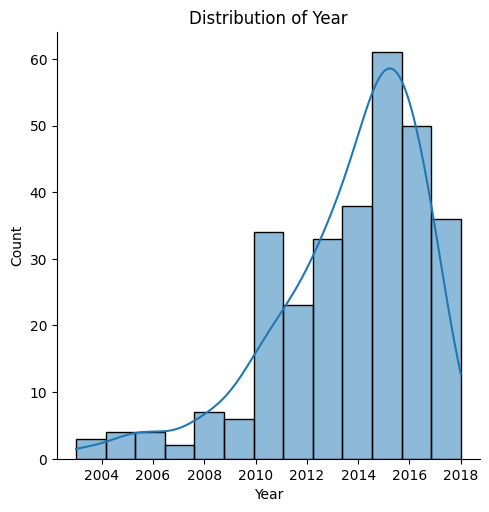

In [ ]:
plot_continuous_distribution(df, 'Year',5)

**BUILDING ML MODEL FOR PREDICTING CAR SELLING PRICES**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

features=['Year', 'Present_Price', 'Driven_kms', 'Owner']

X = df[features]
Y = df.Selling_Price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

Model_Car = RandomForestRegressor(n_estimators=100, random_state = 42, max_depth=5)
Model_Car.fit(X_train, Y_train)

preds = Model_Car.predict(X_test)

print("Mean Absolute Error (MAE) : ", mean_absolute_error(Y_test, preds))
print("Accuracy Score : ", r2_score(Y_test, preds))

Mean Absolute Error (MAE) :  0.6586993727438788
Accuracy Score :  0.9258486102430054


**PERFORMING A MANUAL PREDICTION BASED ON EXISTING DATA**

In [ ]:
val = Model_Car.predict([[2014, 6.87, 42450, 0]])

print("Predicted Price : ", val)
print("Actual Selling Price : 4.60")

Predicted Price :  [4.57391096]
Actual Selling Price : 4.60


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
